# BIGMART SALES DATA ANALYSIS AND VISUALIZATION

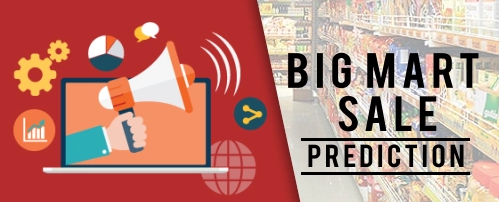

## Statement

Data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. 

Importan factor of this analysis is to identify the sales of each product at a different store level, to predict and increase the sales at product level and store level.

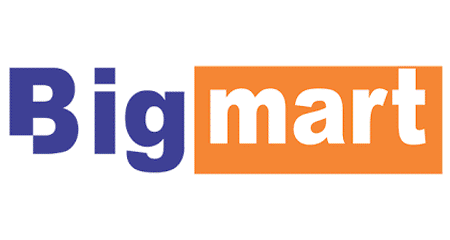

# Analysis

Importing required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as tick

# Loading the Dataset

In [2]:
data = pd.read_csv("C:\\Users\\SHASHI\\OneDrive\\Desktop\\Python\\Sales Prediction for Big Mat Outlets\\Train.csv")

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


# DIMENSION OF THE DATA

In [5]:
print(data.shape)
data.dtypes

(8523, 12)


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# DESCRIBE METHOD

In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Average sales for all stores is 2181.28, minimum sales is 33.29 and maximum sales is 13,086.96


# APPLYING UNIQUE METHOD 

For Product Type, Item Type and Outlet identifier

In [7]:
print(data['Item_Fat_Content'].unique())
data['Item_Fat_Content'].value_counts()

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

## We see come irregularities in above data 'Item_Fat_Content',  lets fix them!

In [8]:
data['Item_Fat_Content'].replace(['LF','reg','low fat'],['Low Fat','Regular','Low Fat'], inplace = True) 

In [9]:
print(data['Item_Fat_Content'].unique())
data['Item_Fat_Content'].value_counts()

['Low Fat' 'Regular']


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Now we see irregular data been fixed for "Item_Fat_Content' column.

In [10]:
print(data['Item_Type'].unique())
print(data['Item_Type'].value_counts())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


In [11]:
print(data['Outlet_Identifier'].unique())
(data['Outlet_Identifier'].value_counts())

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

# MISSING VALUES TREATMENT

## In Machine Learning most of the Libraries will not able to give the output or through an error, won't fit a model or can lead to an incorrect analysis (Output) due to missing values in the dataset.

### We will try to identify and impute the missing values based on the category of data.


In [12]:
data.isnull().sum()/len(data)*100 # Finding missing values in percentages

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [13]:
data.apply(lambda x: (sum(x.isnull()))) # number of values of count of items missing

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# OBSERVATIONS:

1. 1463 values missing for Item_Weight
2. 2410 values missing for Outlet_Size

### Lets check the value count of missing data columns, Item_Weight, Outlet_Size:

In [14]:
print('Categorical Value Count for the following columns:\n')
print('Item_Weight:')
print(data['Item_Weight'].value_counts())
print('\nOutlet_Size:')
print(data['Outlet_Size'].value_counts())

Categorical Value Count for the following columns:

Item_Weight:
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
6.775      2
9.420      1
6.520      1
5.400      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

Outlet_Size:
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


<AxesSubplot:xlabel='Item_Weight'>

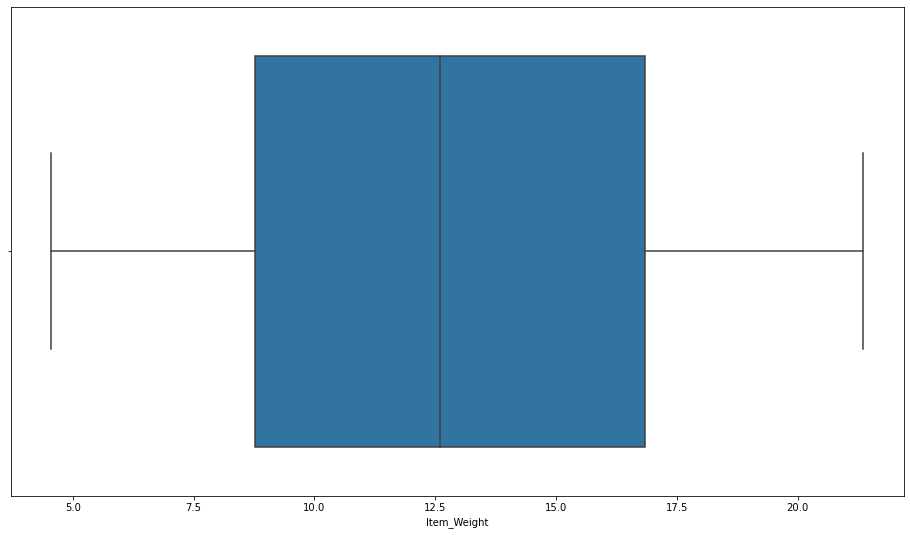

In [15]:
plt.figure(figsize=(16,9))
sns.boxplot('Item_Weight', data = data)

## Above Box Plot shows no outliers in missing values, hence we can impute the missing values with mean for 'Item_Weight'.

## Since 'Outlet_Size' is categorical feature data, we can impute the missing values by "Mode" (Reated Values) from the column.

In [16]:
data['Item_Weight'] = data.groupby('Item_Identifier')['Item_Weight'].fillna(data['Item_Weight'].dropna().mean())
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].dropna().mode().values[0])

In [17]:
data.apply(lambda x: (sum(x.isnull())))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### We can see successfully we have imputed missing values with Mean and Mode

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Exploratory Data Analysis

## Indexing by Number

In [19]:
data.iloc[0:3, 0:12]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


# Max,  Min and Average Method

In [20]:
x = np.max(data['Item_Outlet_Sales'])
print("Maximum Sales:",x)

y = np.min(data['Item_Outlet_Sales'])
print("Minimum Sales:",y)

z = np.mean(data['Item_Outlet_Sales'])
print("Average Sales:",z)

Maximum Sales: 13086.9648
Minimum Sales: 33.29
Average Sales: 2181.2889135750365


# By using Outlet Establishment Year we can findout age of Outlet, lets create new column called Outlet_Age

In [21]:
data['Outlet_Age'] = data['Outlet_Establishment_Year'].apply(lambda x: 2021 -x)

In [22]:
print(data['Outlet_Age'].unique())
data['Outlet_Age'].value_counts()

[22 12 23 34 36 19 14 24 17]


36    1463
34     932
24     930
17     930
22     930
19     929
12     928
14     926
23     555
Name: Outlet_Age, dtype: int64

# Lets feature seperately the Categorical data and Numerical data from dataset.

In [23]:
categorical_feature = data.select_dtypes(include=[np.object])
numerical_feature = data.select_dtypes(include=[np.number])

In [24]:
categorical_feature.head(5)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [25]:
numerical_feature.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
0,9.30,0.016047,249.8092,1999,3735.1380,22
1,5.92,0.019278,48.2692,2009,443.4228,12
2,17.50,0.016760,141.6180,1999,2097.2700,22
3,19.20,0.000000,182.0950,1998,732.3800,23
4,8.93,0.000000,53.8614,1987,994.7052,34


# Data Visualization

## Univariate Plots

Lets create countplots for categorical columns:

#### Columns:

Item_Identifier   
Item_Fat_Content   
Item_Type   
Outlet_Identifier   
Outlet_Size   
Outlet_Location_Type   
Outlet_Type   

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

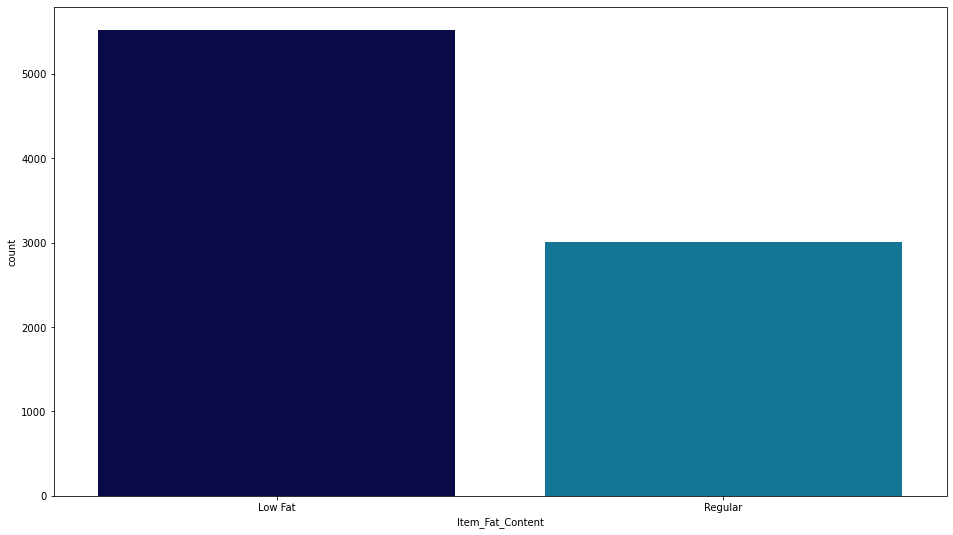

In [26]:
plt.figure(figsize=(16,9))
sns.countplot('Item_Fat_Content', data=data, palette='ocean')

# Observations:

### Item_Fat_Content - Most of the items are at low Fat Content

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

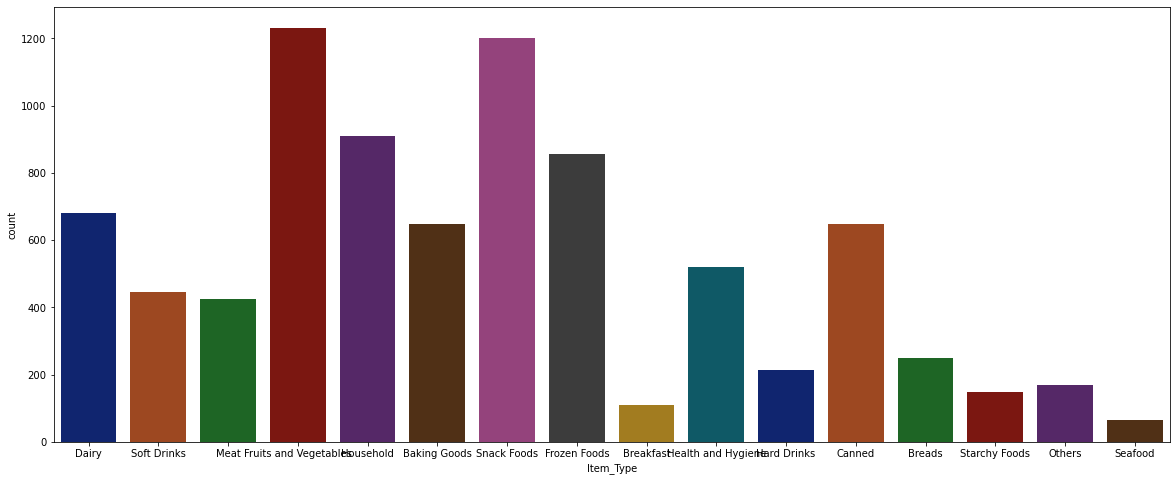

In [27]:
plt.figure(figsize=(20,8))
sns.countplot('Item_Type', data=data, palette='dark')

# Observations:

### Item_Type - Distinctly popular and sold are Fruits and Vegetables and Snack Foods.

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

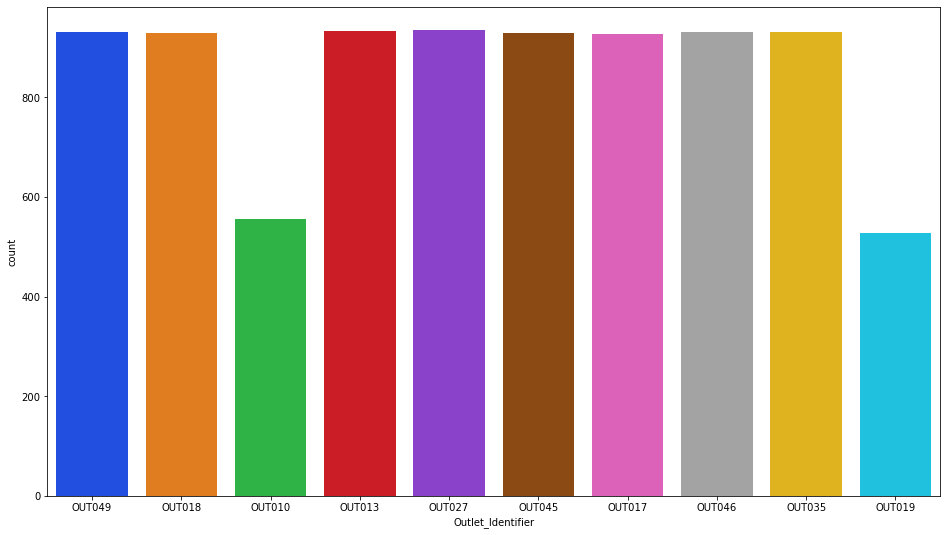

In [28]:
plt.figure(figsize=(16,9))
sns.countplot('Outlet_Identifier', data=data, palette='bright')

# Observations

### Outlet_Identifier - Mostly all the outlets sold items are even, except OUT010 & OUT019 significantly low.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

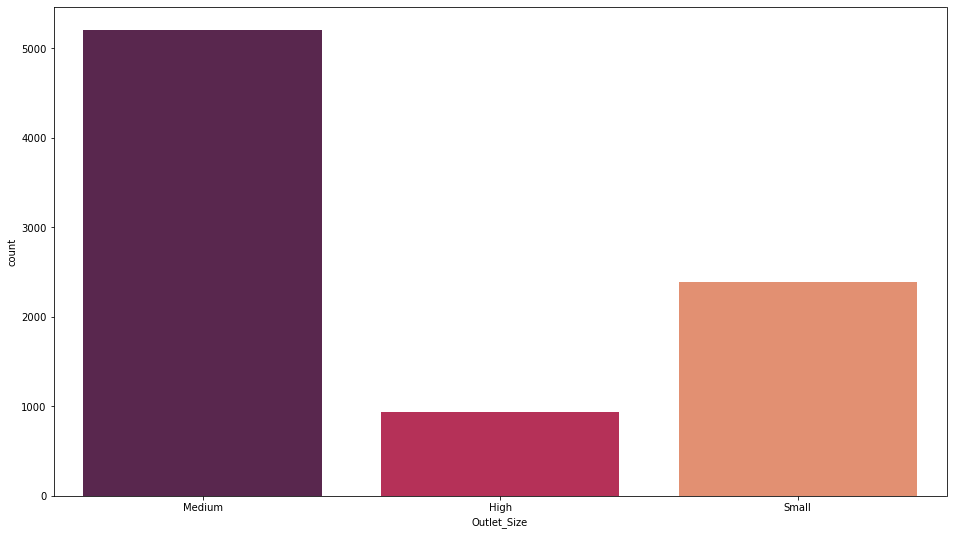

In [29]:
plt.figure(figsize=(16,9))
sns.countplot('Outlet_Size', data=data, palette='rocket')

# Observations:

### Outlet_Size - Mostly outlets are medium sized.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

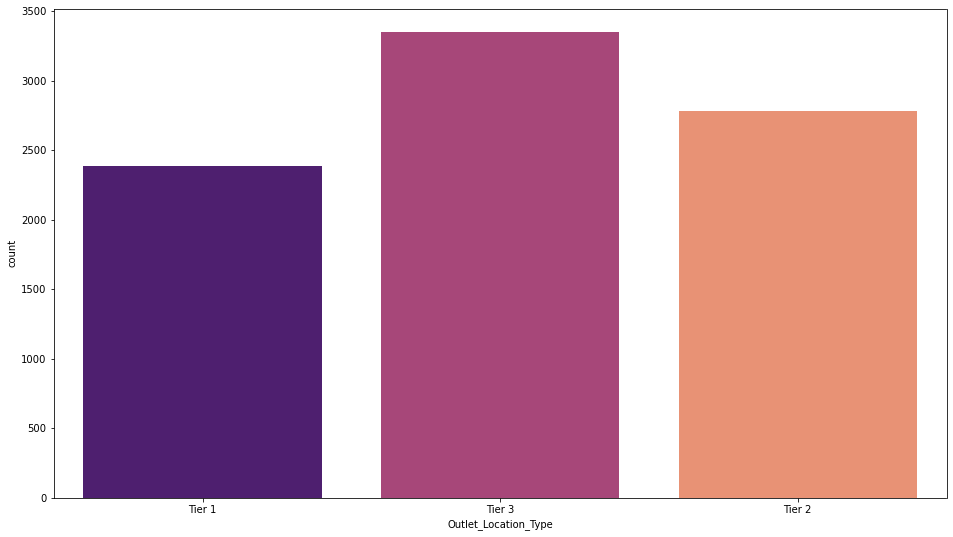

In [30]:
plt.figure(figsize=(16,9))
sns.countplot('Outlet_Location_Type', data=data, palette='magma')


# Observations:

### Outlet_Location_Type - Most common type is Tier3.

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

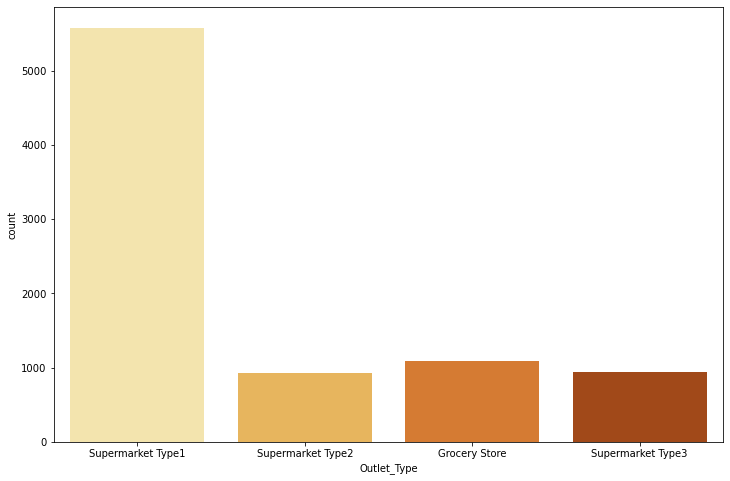

In [31]:
plt.figure(figsize=(12,8))
sns.countplot('Outlet_Type', data=data, palette='YlOrBr')

# Observations

### Outlet_Type - A wide range of sales are for Supermarket Type1.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

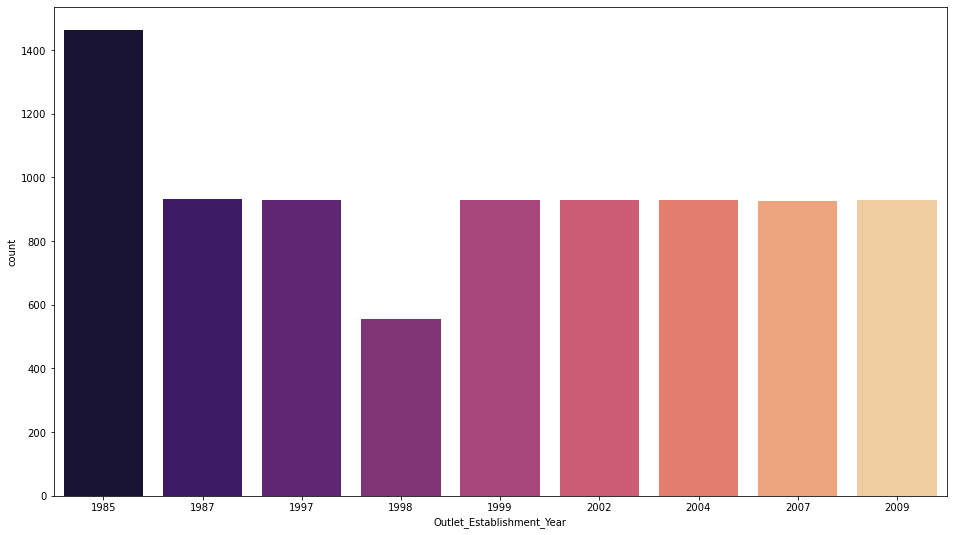

In [32]:
plt.figure(figsize=(16,9))
sns.countplot('Outlet_Establishment_Year', data=data, palette='magma')

# Observations:

### The outlets are more of established and running from 35 years.

# Bivariate Analysis

# 1. Fat content on outlet Sales

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

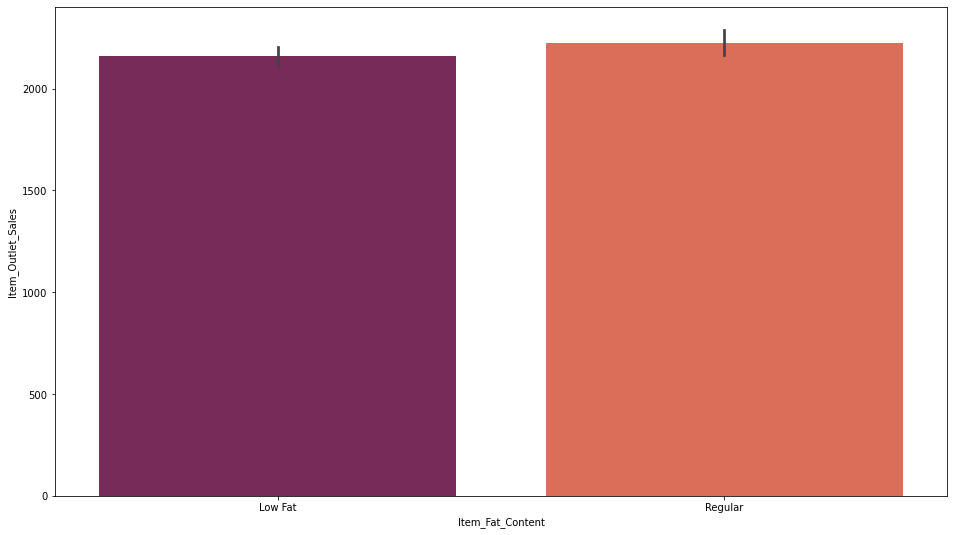

In [33]:
plt.figure(figsize=(16,9))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales', data=data, palette='rocket')

# Observations:

### * Outlet Sales are high for both Low Fat Content and Regular Fat Content products

# 2. Item Visibility

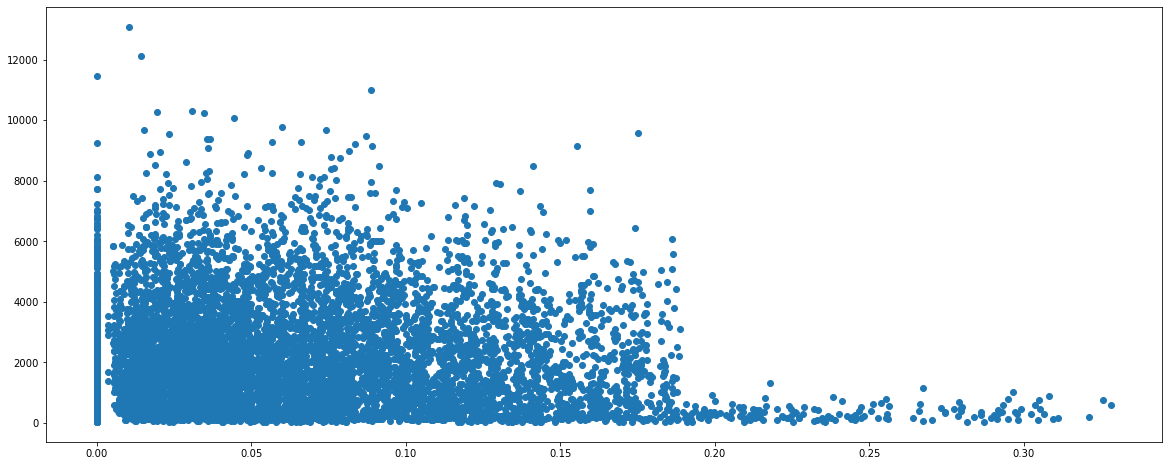

In [34]:
plt.figure(figsize=(20,8))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=data)

# Observations:

Item_Visibility has a minimum value of zero. Which makes no sense as a product is being sold in a store, the visibility cannot be zero.

## Looks like missing information for Item Visibility, since product is sold but minimum value is zero. Lets impute it with mean visibility of that product.

In [35]:
data['Item_Visibility'] = data['Item_Visibility'].replace(0,data['Item_Visibility'].mean())

In [36]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070213,140.992782,1997.831867,2181.288914,23.168133
std,4.226124,0.048742,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.003575,31.290000,1985.000000,33.290000,12.000000
25%,9.310000,0.033085,93.826500,1987.000000,834.247400,17.000000
50%,12.857645,0.062517,143.012800,1999.000000,1794.331000,22.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,34.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,36.000000


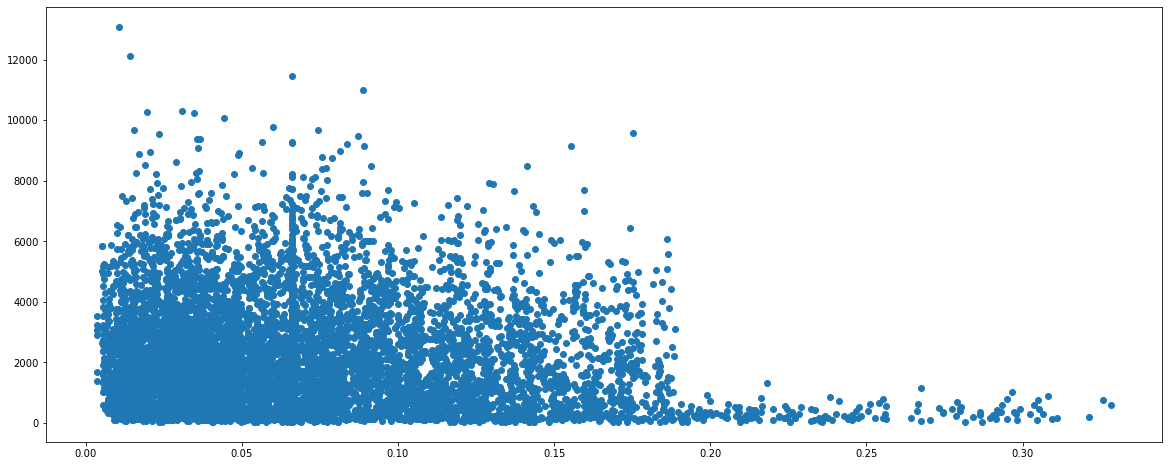

In [37]:
plt.figure(figsize=(20,8))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=data)

## We can see that now Item Visibility minimum value is not zero post imputation with mean value.

# 3. Impact of Outlet Establishment Year on Sales

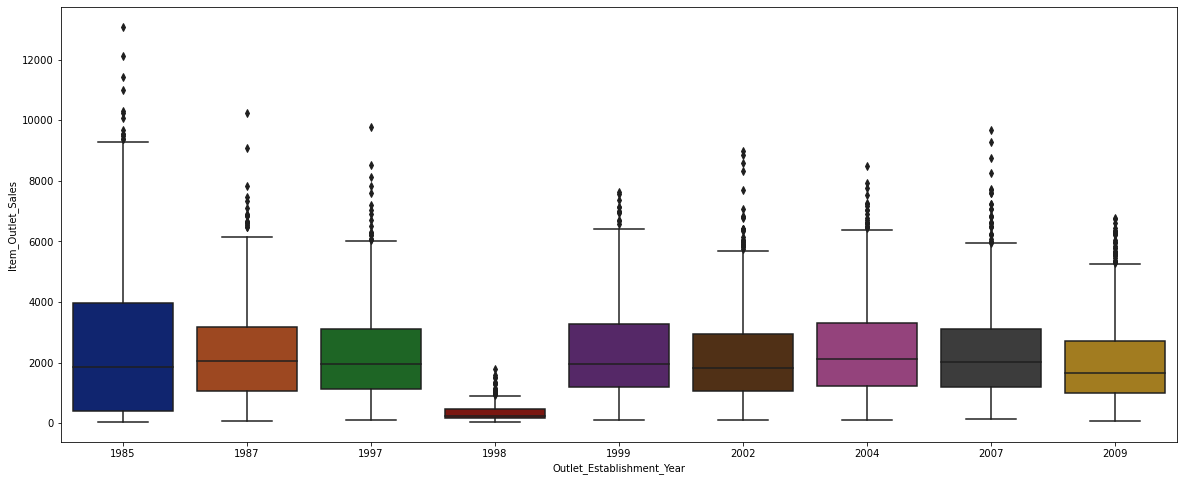

In [38]:
plt.figure(figsize=(20,8))
sns.boxplot('Outlet_Establishment_Year','Item_Outlet_Sales',data=data,palette='dark')
plt.show()

# Observations:

## Median sales recored across all stores established from 1985 to 2009. Except for 1998 year establish store which recorded low in sales. Highest Item Outlet Sales recorded by stores established in 1985.

# 4. Impact of Item Type vs Sales

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

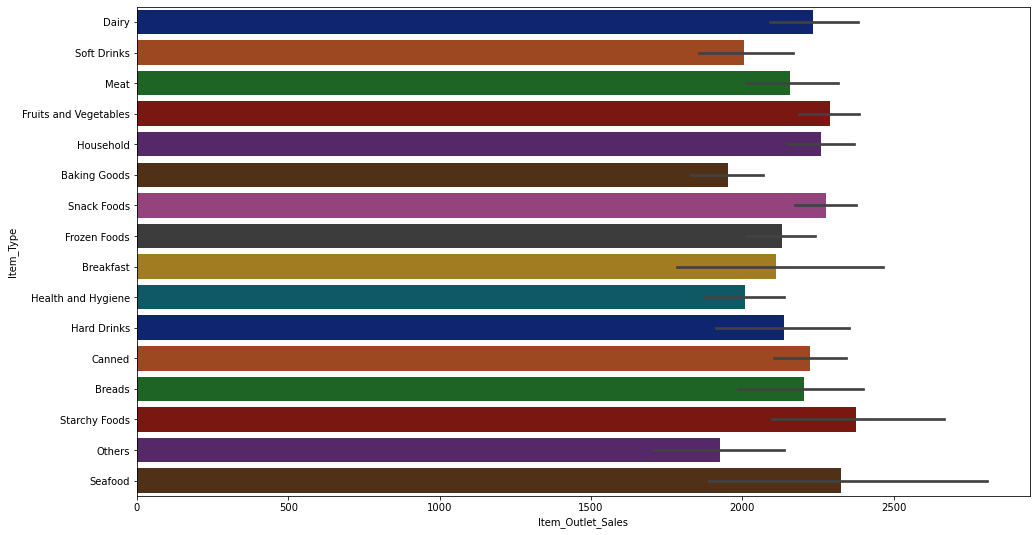

In [39]:
plt.figure(figsize=(16,9))
sns.barplot('Item_Outlet_Sales','Item_Type', data=data, palette='dark')

# Observations

## All the Item Type sales recorded are similiar, however highest recorded sales for Starchy Foods, Seafood.

## Hence sales can be improved by increasing the stock of products that are most bought by customers.

# Outlet_Identifier on Outlet_Sales

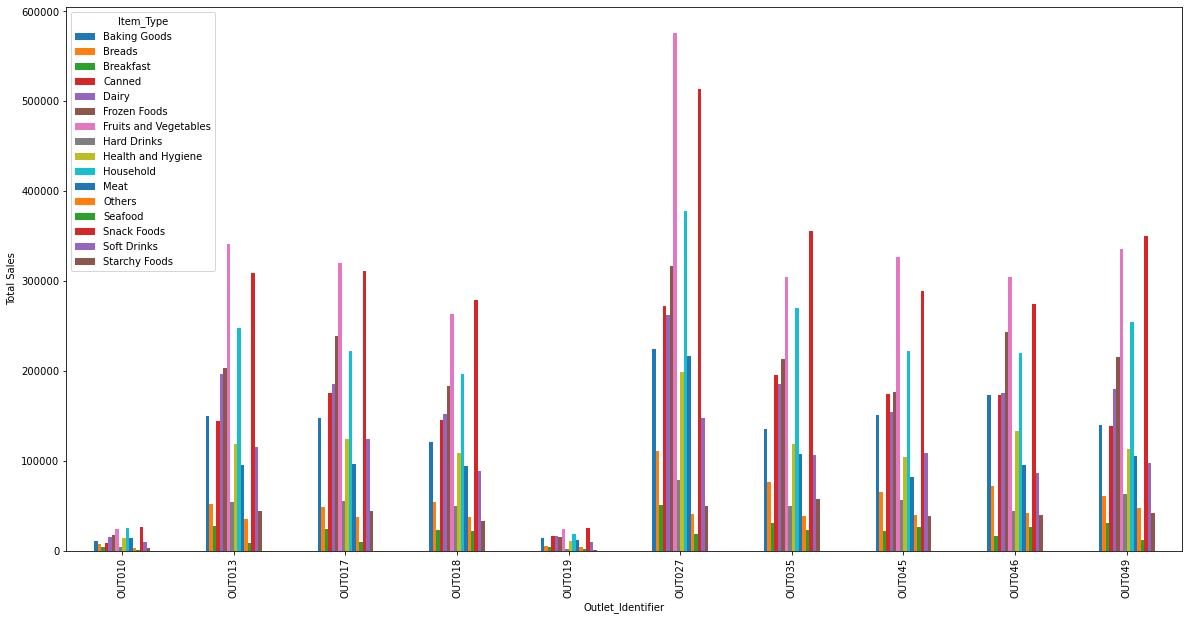

In [40]:
piv=data.pivot_table(index='Outlet_Identifier',values='Item_Outlet_Sales',columns='Item_Type',aggfunc=sum)
piv.plot(kind='bar',figsize=(20,10))
plt.ylabel('Total Sales')
plt.show()

# Observations:

### Fruits and Vegetables, Snack Food generated highest sales from OUT027 outlet.
### Top three products are Fruits and Vegetables, Snack Foods and Household

# Correlation Matrix

<AxesSubplot:>

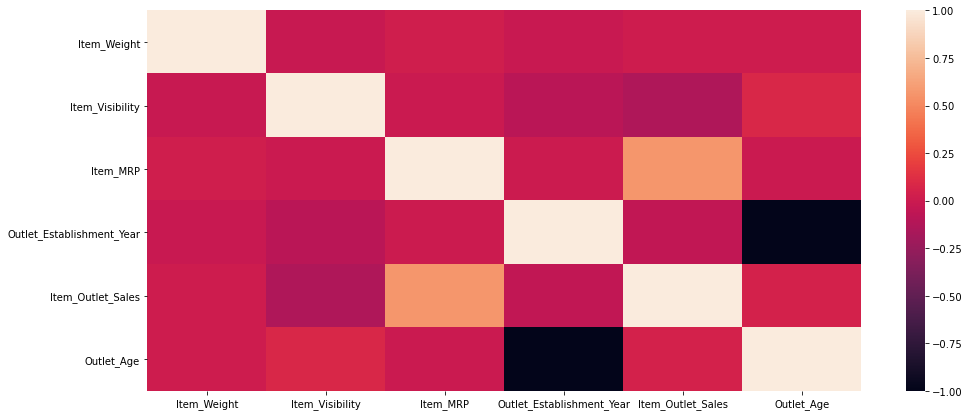

In [41]:
plt.figure(figsize = (16,7))
sns.heatmap(data.corr(), cmap = 'rocket')

We can see the Item_Outlet_Sales is highly correlated with Item_MRP

# Multivariate Analysis

## 1. Impact of Outlet_Identifier on Outlet_Sales

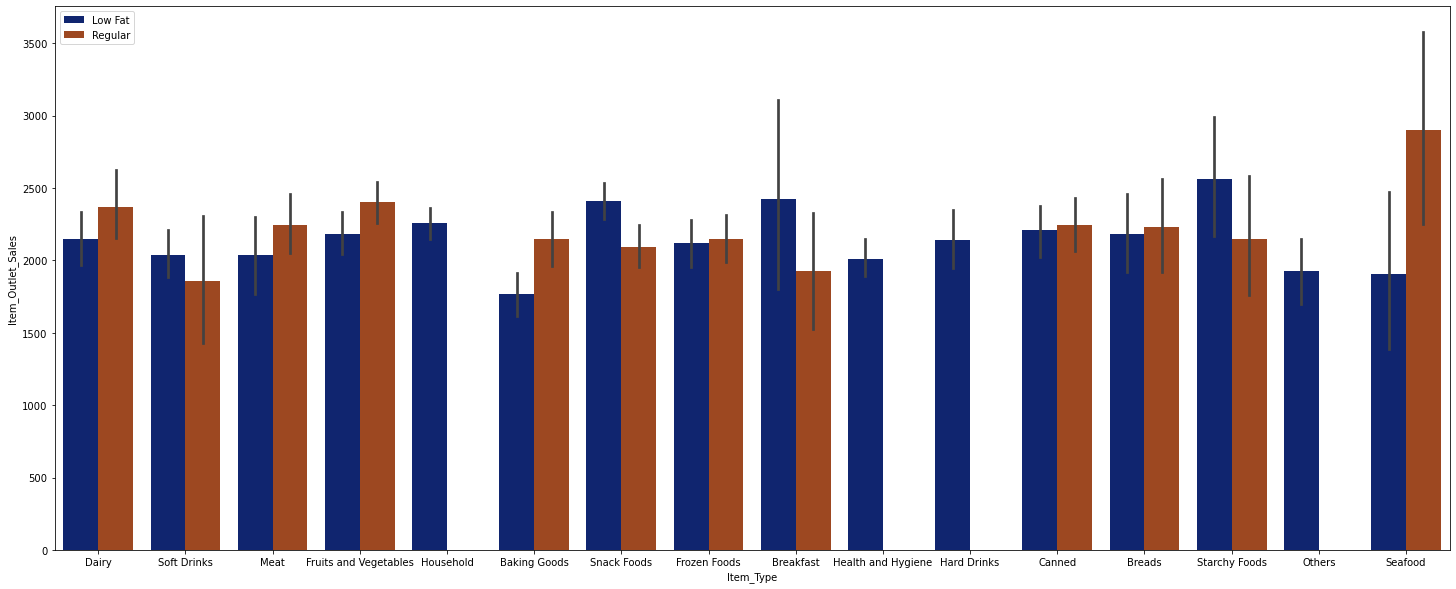

In [42]:
plt.figure(figsize=(25,10))
sns.barplot('Item_Type','Item_Outlet_Sales', hue = 'Item_Fat_Content', data = data, palette = 'dark')
plt.legend()

 # 5. Feature Engineering
 
 # Categorical Values:
 
 ## We have 7 columns which need to be deleted or encode.
 
 ### Ordinal Variables:
 
 #### Item Fat Content
 #### Outlet_Size
 #### Outlet Location Type
 
 ### Nominal Variables:
 
 #### Item Identifier
 #### Item Type
 #### Outlet Identifier
 #### Outlet Type
 
 ## Numerical Values:
 
 #### * From Numerical Variables Outlet Establishment Year is no longer needed
 
 ## Conclusion:
 
#### 1. The columns Outlet Establishment Year, Item Identifier and Outlet Identifier dont have significant values so we will drop them.
#### 2. All Ordinal variables will be Label encoded.
#### 3. The columns Outlet TYpe and Item Type will be One Hot encoded. 

## Lets check number of unique values in each column

In [43]:
categorical_feature.apply(lambda x: x.nunique())

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

## Label Encoding

In [44]:
#Import encoding library:
from sklearn.preprocessing import LabelEncoder

In [45]:
label_encoding = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    data[i] = label_encoding.fit_transform(data[i])

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,22
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,12
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,22
3,FDX07,19.20,1,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,23
4,NCD19,8.93,0,0.066132,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,34


# One hot encoding

In [46]:
# Import One Hot Encode Library:

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model import train_

In [47]:
# One hot encoding:

columns = ['Item_Type','Outlet_Type']

# creating instance of one-hot-encoder
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse=False)

oh = pd.DataFrame(ohe.fit_transform(data[columns]).astype('int64'))

# Get feature columns:
oh.columns = ohe.get_feature_names(columns)

# One-Hot encoding removed index: put it back
oh.index = data.index

# Add one hot encoded columns to our main df new name: data_fe (means feature engineered)

data_fe = pd.concat([data, oh], axis=1)

In [48]:
data_fe.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,...,0,0,0,0,0,0,0,1,0,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,...,0,0,0,0,1,0,0,0,1,0


# Machine Learning Models

## Lets create our dataset as two variables. X as the features and y as Item Outlet Sales, so that target value we want to predict

# Models we will use:

## 1. Linear Regression

# The Process of Modeling the Data:

## Importing the model

### Fitting the model

### Predicting Item Outlet Sales

### Regression metrics

## Score Metrics for Regression:
#### Mean Absolute Error (MAE) - Mean of the absolute value of errors (absolute distance from true value):

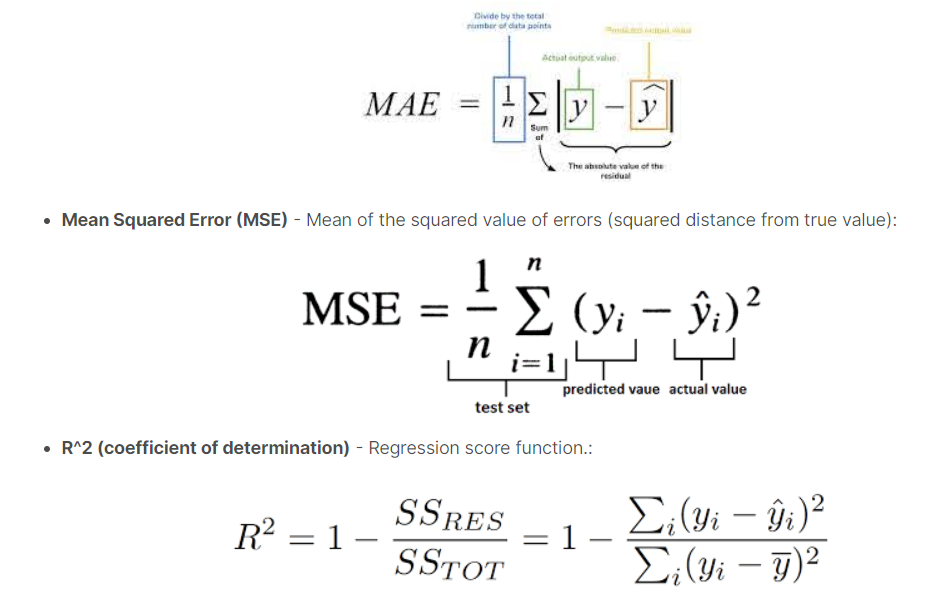

In [51]:
# Importing Train Test and Split module

from sklearn.model_selection import train_test_split

In [52]:
X = data_fe.drop('Item_Outlet_Sales', axis = 1)
y = data_fe['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [57]:
def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

## Linear Regression

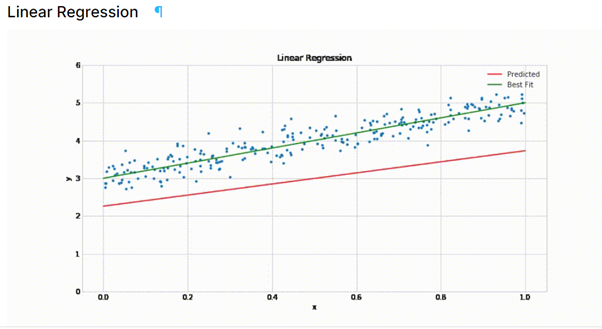

In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).

Linear regression was the first type of regression analysis to be studied rigorously, and to be used extensively in practical applications. This is because models which depend linearly on their unknown parameters are easier to fit than models which are non-linearly related to their parameters and because the statistical properties of the resulting estimators are easier to determine.